In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.feature as cfeature
import os
import matplotlib.ticker as mticker
#import healpy as hp

import cartopy
#from ulmo.analysis.spatial_plots import evals_to_healpix, evals_to_healpix_stat, show_med_LL

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# this is going to be my Healpy-less images

/Users/rachelstumpf/ulmo/ulmo/utils/image_utils.py:8: UserWarning: healpy not installed.  Not all functions will work!
  warnings.warn("healpy not installed.  Not all functions will work!")


In [11]:
file_path = '/Users/rachelstumpf/Desktop/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc'
aug10 = xarray.open_dataset(file_path)
aug10['sea_surface_temperature'] = aug10['sea_surface_temperature'] - 273.15
aug10 = aug10['sea_surface_temperature'].squeeze(dim='time')

In [1]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mollweide())

im = aug10.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmin=-5, vmax=40)

ax.add_feature(cfeature.LAND, facecolor='darkgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('August 10, 2012 L3S SST Field')
cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])

cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('Sea Surface Temperature (°C)')

#plt.show()

#save_dir = os.path.expanduser('~/Downloads')
#save_filename = os.path.join(save_dir, 'daily.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)

NameError: name 'plt' is not defined

In [6]:
file_path = '/Users/rachelstumpf/Desktop/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_AM_D-ACSPO_V2.80-v02.0-fv01.0.nc'
aug10day = xarray.open_dataset(file_path)
aug10day['sea_surface_temperature'] = aug10day['sea_surface_temperature'] - 273.15
aug10day = aug10day['sea_surface_temperature'].squeeze(dim='time')

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mollweide())

im = aug10day.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmin=-5, vmax=40)

ax.add_feature(cfeature.LAND, facecolor='darkgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('August 10, 2012 L3 Daytime SST Field')
cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])

cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('Sea Surface Temperature (°C)')

#plt.show()

#save_dir = os.path.expanduser('~/Downloads')
#save_filename = os.path.join(save_dir, 'daytime.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)

In [9]:
file_path = '/Users/rachelstumpf/Desktop/20120810120000-STAR-L3S_GHRSST-SSTsubskin-LEO_PM_N-ACSPO_V2.80-v02.0-fv01.0.nc'
aug10night = xarray.open_dataset(file_path)
aug10night['sea_surface_temperature'] = aug10night['sea_surface_temperature'] - 273.15
aug10night = aug10night['sea_surface_temperature'].squeeze(dim='time')

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mollweide())

im = aug10night.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic', vmin=-5, vmax=40)

ax.add_feature(cfeature.LAND, facecolor='darkgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.5, linestyle='--', color='gray')
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(mticker.MultipleLocator(base=1.0))

plt.title('August 10, 2012 L3 Nighttime SST Field')
cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])

cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label('Sea Surface Temperature (°C)')

#plt.show()

#save_dir = os.path.expanduser('~/Downloads')
#save_filename = os.path.join(save_dir, 'nighttime.png')

#plt.savefig(save_filename, dpi=300, bbox_inches='tight')
#plt.close(fig)

In [5]:
# check extraction tables

table_2012 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2012.parquet')
table_2013 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2013.parquet')
table_2014 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2014.parquet')
table_2015 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2015.parquet')
table_2016 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2016.parquet')
table_2017 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2017.parquet')
table_2018 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2018.parquet')
table_2019 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2019.parquet')
table_2020 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2020.parquet')

table_all = pandas.concat([table_2012, table_2013, table_2014, table_2015,
                        table_2016, table_2017, table_2018, table_2019, table_2020])
table_all.reset_index(drop=True, inplace=True)

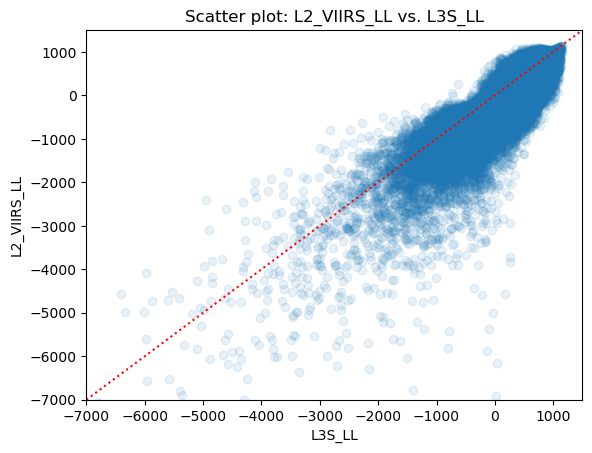

In [13]:
plt.scatter(table_all['LL'], table_all['VIIRS_LL'], alpha = 0.1) # x,y
plt.xlabel('L3S_LL')
plt.ylabel('L2_VIIRS_LL')
plt.title('Scatter plot: L2_VIIRS_LL vs. L3S_LL')
plt.plot([-7000, 7000], [-7000, 7000], color='red', linestyle='dotted')
plt.xlim(-7000, 1500)
plt.ylim(-7000, 1500)

plt.show()

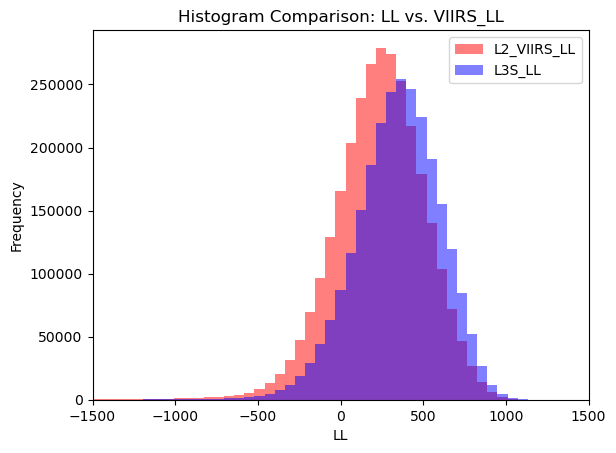

In [61]:
# make bins into array
bin_edges = np.linspace(-1500, 1500, 50)

plt.hist(table_all['VIIRS_LL'], bins=bin_edges, alpha=0.5, label='L2_VIIRS_LL', color='red')
plt.hist(table_all['LL'], bins=bin_edges, alpha=0.5, label='L3S_LL', color='blue')

plt.xlabel('LL')
plt.ylabel('Frequency')
plt.title('Histogram Comparison: LL vs. VIIRS_LL')
plt.xlim(-1500, 1500)
plt.legend()
plt.show()

/Users/rachelstumpf/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


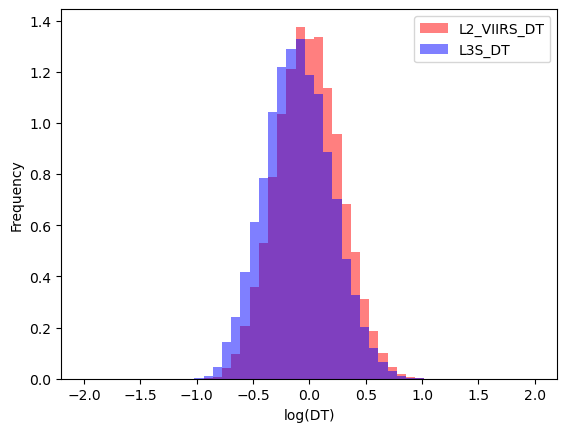

In [70]:
# make bins into array, take log of DT values
#bin_edges = np.linspace(0, 10, 50)
bin_edges = np.linspace(-2,2, 50)
plt.hist(np.log10(table_all['VIIRS_DT']), bins=bin_edges, alpha=0.5, label='L2_VIIRS_DT', color='red', density = True)
plt.hist(np.log10(table_all['DT']), bins=bin_edges, alpha=0.5, label='L3S_DT', color='blue', density = True)

plt.xlabel('log(DT)')
plt.ylabel('Frequency')
#plt.title('Histogram Comparison: LL vs. VIIRS_LL')
#plt.xlim(-1500, 1500)
plt.legend()
plt.show()

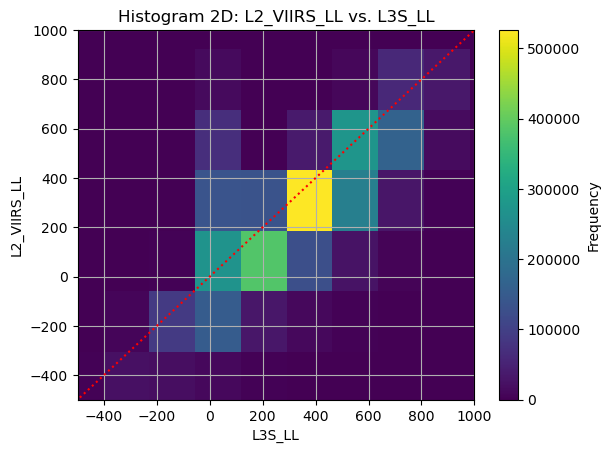

In [25]:
LL_data = np.nan_to_num(table_all['LL'], nan=0)
VIIRS_LL_data = np.nan_to_num(table_all['VIIRS_LL'], nan=0)

plt.hist2d(LL_data, VIIRS_LL_data, bins=50, cmap='viridis')
plt.xlabel('L3S_LL')
plt.ylabel('L2_VIIRS_LL')
plt.title('Histogram 2D: L2_VIIRS_LL vs. L3S_LL')
plt.grid()
plt.plot([-7000, 7000], [-7000, 7000], color='red', linestyle='dotted')

plt.xlim(-500, 1000) 
plt.ylim(-500, 1000) 

cbar = plt.colorbar()
cbar.set_label('Frequency')

plt.show()

In [48]:
# find the cutout from 2012 that has VIIRS_LL of -100 and LL of 500

viirs_negative_ex = table_all[
    (table_all['VIIRS_LL'] >= -105) & (table_all['VIIRS_LL'] <= -95) &
    (table_all['LL'] >= 495) & (table_all['LL'] <= 505)
].iloc[0]

# want the 2012-11-18
viirs_negative_ex[['VIIRS_pp_idx', 'pp_idx', "LL", "VIIRS_LL", 'VIIRS_DT', 'DT']]

VIIRS_pp_idx        491688
pp_idx              122729
LL              504.460144
VIIRS_LL         -99.02533
VIIRS_DT          1.050018
DT                0.450012
Name: 259226, dtype: object

In [49]:
pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 122729

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_close_ex = L3S_close_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 491688 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_close_ex = VIIRS_close_ex[0,...]

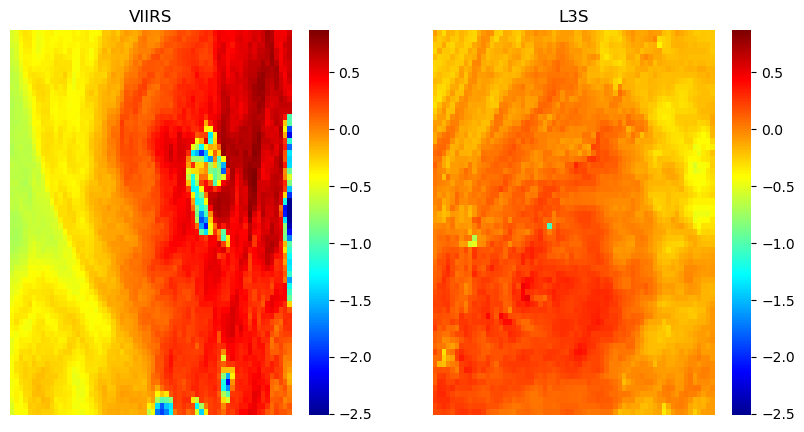

In [51]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_close_ex)
viirs_max = np.max(VIIRS_close_ex)
l3s_min = np.min(L3S_close_ex)
l3s_max = np.max(L3S_close_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_close_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_close_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [57]:
viirs_positive_ex = table_all[
    (table_all['VIIRS_LL'] >= 150) & (table_all['VIIRS_LL'] <= 205) &
    (table_all['LL'] <= -95) & (table_all['LL'] >= -105)
].iloc[0]

viirs_positive_ex[['VIIRS_pp_idx', 'pp_idx', "LL", "VIIRS_LL", 'VIIRS_DT', 'DT']]

VIIRS_pp_idx        606026
pp_idx              245878
LL             -100.609497
VIIRS_LL         154.00061
VIIRS_DT          1.720001
DT                1.570007
Name: 206851, dtype: object

In [59]:
pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 245878

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_close_ex = L3S_close_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 606026 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_close_ex = VIIRS_close_ex[0,...]

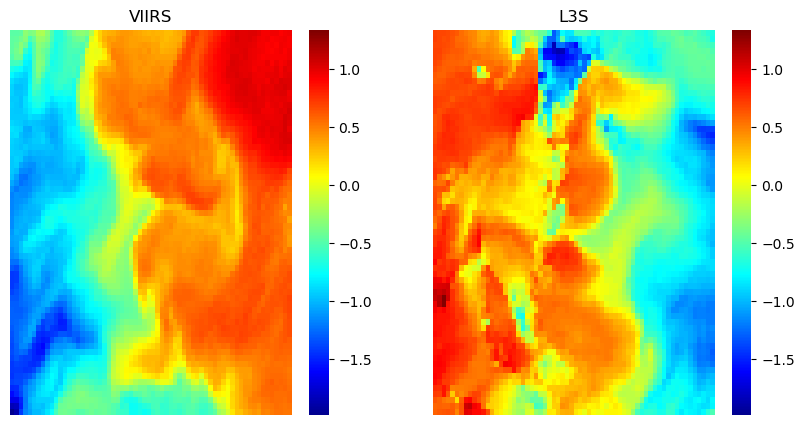

In [60]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_close_ex)
viirs_max = np.max(VIIRS_close_ex)
l3s_min = np.min(L3S_close_ex)
l3s_max = np.max(L3S_close_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_close_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_close_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()